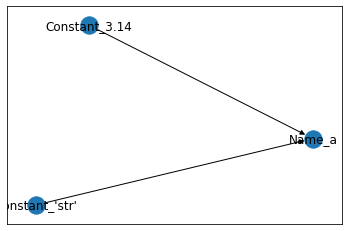

In [1]:
from constraint_graph import ConstraintGraph
import networkx as nx
import ast

s = """
def test(string):
    a = 3.14
    if (string):
        a = 'str'
    return a
"""
sa = ast.parse(s)

cg = ConstraintGraph()
cg.dispatch(sa.body[0].body)
nx.draw_networkx(cg.g)

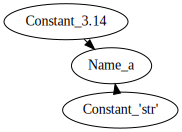

In [16]:
from IPython.display import SVG, display
ag = nx.nx_agraph.to_agraph(cg.g)
display(SVG(ag.draw(prog='fdp', format='svg')))

In [15]:
import typy
return_labels = []
for t in ast.walk(sa.body[0]):
    if t.__class__.__name__ == 'Return':
        label, t = cg.dispatch(t.value)
        return_labels.append(label)
type_candidates = list(map(cg.get_types, return_labels))
print(type_candidates)
type_candidates = sum(type_candidates, [])
ret_type = typy.get_type_str_from_candidate(type_candidates)
print(ret_type)

[['str', 'float']]
Union[float, str]


In [17]:
import astunparse
sa.body[0].returns = ast.Name(ret_type)
print(astunparse.unparse(sa))



def test(string) -> Union[float, str]:
    a = 3.14
    if string:
        a = 'str'
    return a

